In [3]:
from ift6758.data import get_player_stats
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

import pandas as pd

Importing Data

In [ ]:
df = pd.read_csv('../Dataset/all_seasons.csv')
df.head()

In [18]:
Season=2016
Season_df = df[df['season']==Season]
print(Season_df.shape)
Season_df.head()

(80399, 14)


,event_type,period,period_time,period_type,gameID,team_of_shooter,x_coord,y_coord,shooter,goalie,shot_type,empty_net,strength,season
0,Shot,1,01:11,REGULAR,2016020001,Toronto Maple Leafs,-77.0,5.0,Mitchell Marner,Craig Anderson,Wrist Shot,NaN,NaN,2016
1,Shot,1,02:53,REGULAR,2016020001,Ottawa Senators,86.0,13.0,Chris Kelly,Frederik Andersen,Wrist Shot,NaN,NaN,2016
2,Shot,1,04:01,REGULAR,2016020001,Ottawa Senators,23.0,-38.0,Cody Ceci,Frederik Andersen,Wrist Shot,NaN,NaN,2016
3,Shot,1,04:46,REGULAR,2016020001,Ottawa Senators,33.0,-15.0,Erik Karlsson,Frederik Andersen,Slap Shot,NaN,NaN,2016
4,Shot,1,06:46,REGULAR,2016020001,Toronto Maple Leafs,-34.0,28.0,Martin Marincin,Craig Anderson,Wrist Shot,NaN,NaN,2016


Shot types over all teams

['Backhand', 'Deflected', 'Slap Shot', 'Snap Shot', 'Tip-In', 'Wrap-around', 'Wrist Shot']
[698, 199, 829, 1172, 713, 70, 3681]
[5862, 806, 12691, 11561, 3267, 773, 38056]


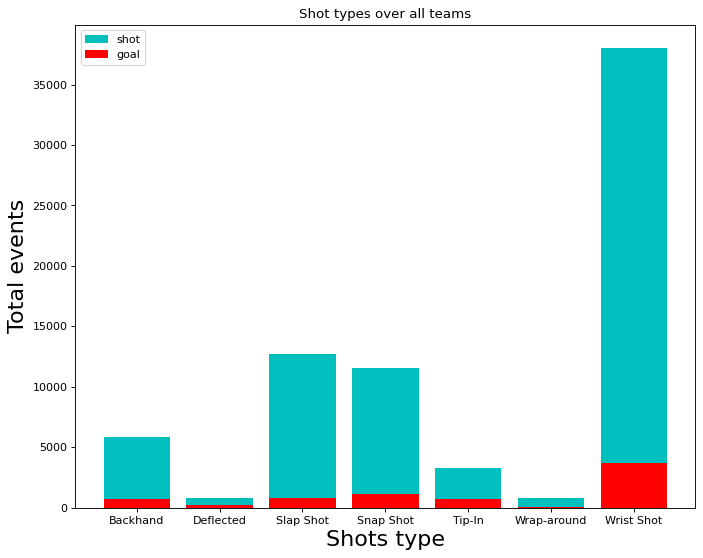

In [178]:
shot_type=list(Season_df.groupby(['shot_type']).groups.keys())


groupedByDataSet=Season_df.groupby(['shot_type','event_type']).size().reset_index()

Goals= groupedByDataSet[groupedByDataSet['event_type']=='Goal'][0].tolist()

Shots= groupedByDataSet[groupedByDataSet['event_type']=='Shot'][0].tolist()


figure(figsize=(10, 8), dpi=80)
plt.bar(shot_type, Shots, label="shot", color='c')
plt.bar(shot_type,Goals, label="goal", color='r')

plt.plot()

plt.xlabel("Shots type", fontsize=20)
plt.ylabel("Total events",fontsize=20)
plt.title("Shot types over all teams")
plt.legend()
plt.show()

Relationship between the distance a shot was taken and the chance it was a goal

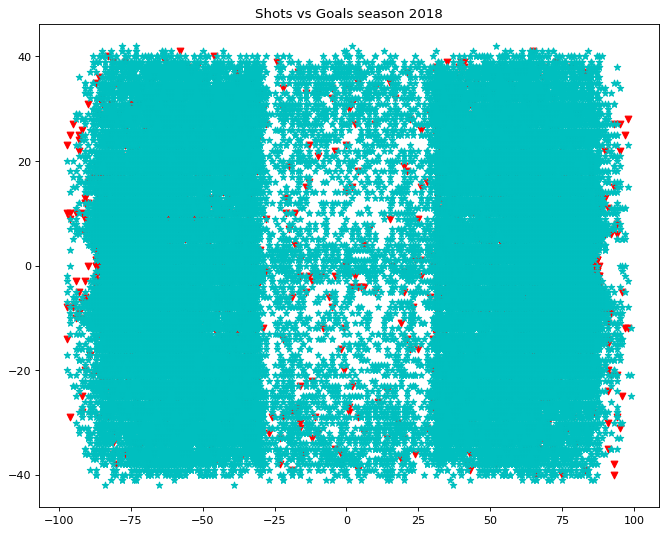

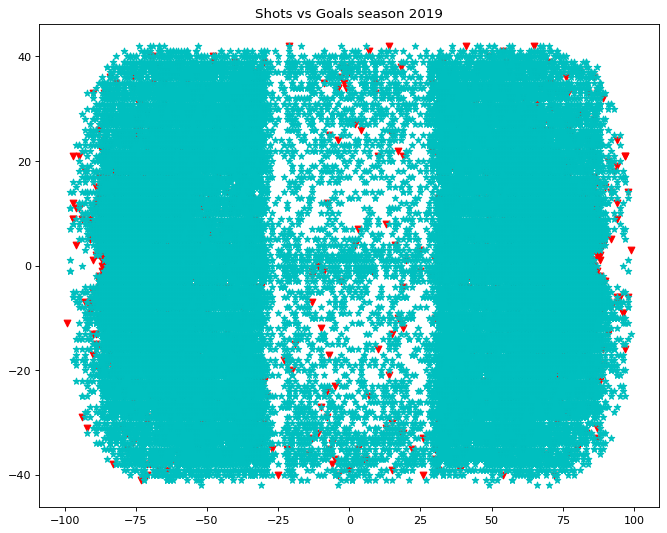

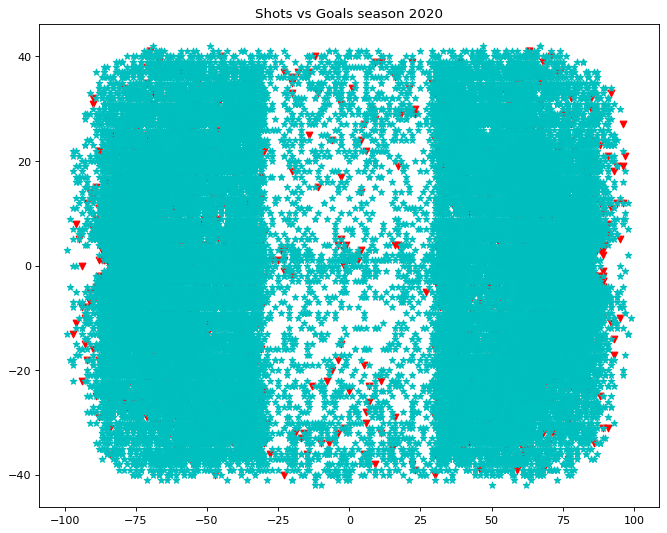

In [201]:
for i in [2018, 2019, 2020]:
    Season=i
    Season_df = df[df['season']==Season]
    #%%
    Goals_x= Season_df[Season_df['event_type']=='Goal']['x_coord']
    Goals_y= Season_df[Season_df['event_type']=='Goal']['y_coord']
    Shots_x= Season_df[Season_df['event_type']=='Shot']['x_coord']
    Shots_y= Season_df[Season_df['event_type']=='Shot']['y_coord']
    Shots


    figure(figsize=(10, 8), dpi=80)
    plt.scatter(Goals_x, Goals_y, marker='v', color='r')
    plt.scatter(Shots_x, Shots_y, marker='*', color='c')
    plt.title('Shots vs Goals season '+ str(i))
    plt.show()


 goals/shots

In [211]:
Season=2018
Season_df = df[df['season']==Season]
percentage = pd.DataFrame()

goals= Season_df[Season_df['event_type']=='Goal'].shape[0]
shots= Season_df[Season_df['event_type']=='Shot'].shape[0]+goals
percentage=goals/shots
percentage


0.0960088433791017